Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/content/IRIS.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [5]:
data = pd.read_csv("/content/Iris.csv")

In [6]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
fig = px.scatter(data_frame=data, x='SepalLengthCm',color='Species')
fig.show()

In [14]:
fig = px.scatter(data_frame=data, x='SepalWidthCm',color='Species')
fig.show()

In [16]:
fig = px.scatter(data_frame=data, x='PetalLengthCm',color='Species')
fig.show()

In [18]:
fig = px.scatter(data_frame=data, x='PetalWidthCm',color='Species')
fig.show()

In [19]:
SC= StandardScaler()
X= SC.fit_transform(X)

In [20]:
np.random.seed(25)

In [21]:
wcss=[]
for k in range(1,20):
    k_means=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

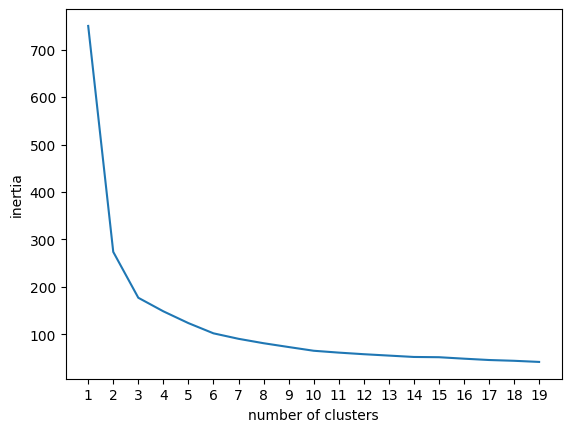

In [22]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [23]:
!pip install kneed
!pip install --upgrade kneed
from kneed import KneeLocator

In [24]:
k1=KneeLocator(range(1,20), wcss, curve='convex', direction= 'decreasing')
k1.elbow

3

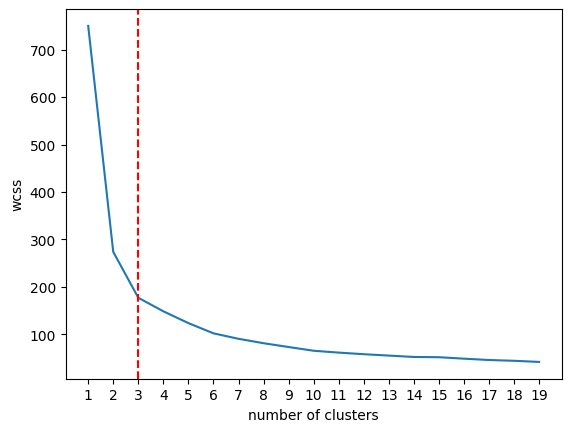

In [25]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.axvline(x=k1.elbow, color='r', ls= '--')
plt.show()

In [26]:
ss =[]
for k in range(2,20):
    k_means=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(X)
    score= silhouette_score(X, k_means.labels_,metric='euclidean')
    ss.append(score)

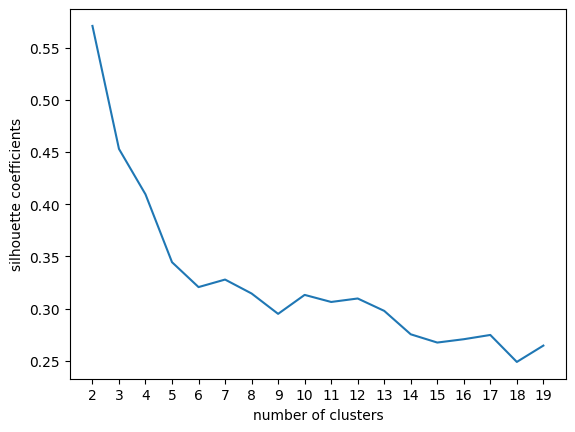

In [27]:
plt.plot(range(2,20),ss)
plt.xticks(range(2,20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

In [28]:
np.random.seed(25)
X=np.random.randint(100,size=(100,2))

In [29]:
wcss=[]
for k in range(1,20):
    k_means=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

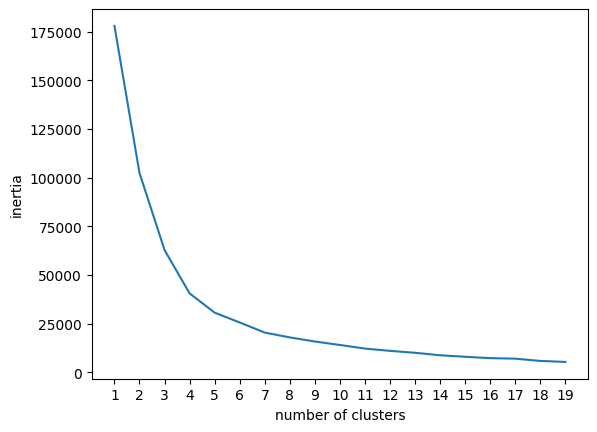

In [30]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [31]:
k1=KneeLocator(range(1,20), wcss, curve='convex', direction= 'decreasing')
k1.elbow

5

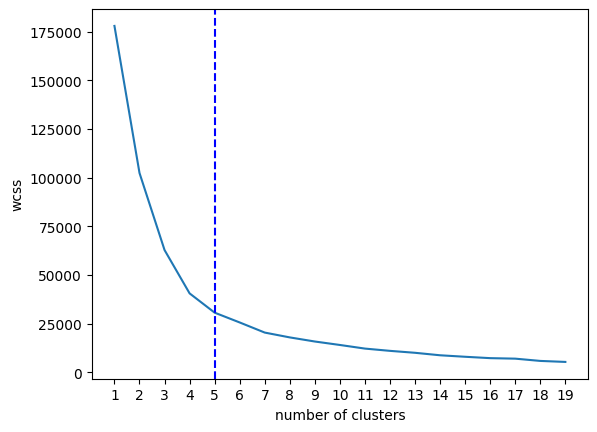

In [32]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.axvline(x=k1.elbow, color='b', ls= '--')
plt.show()

In [33]:
ss =[]
for k in range(2,20):
    k_means=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(X)
    score= silhouette_score(X, k_means.labels_,metric='euclidean')
    ss.append(score)

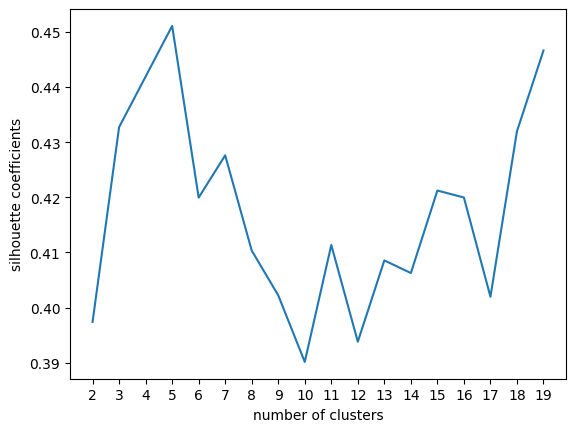

In [34]:
plt.plot(range(2,20),ss)
plt.xticks(range(2,20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()